# XGBoost Model Analysis

## XGBoost with Pixels

In [1]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# Training Data
X_train = np.load("data/train_pixels.npy") 
X_trainLAND = np.load("data/train_landmarks.npy")
y_train = np.load("data/train_labels.npy")
    
# Public Test Data - Used to Validate Training
X_test = np.load("data/eval_pixels.npy")
X_testLAND = np.load("data/eval_landmarks.npy")
y_test = np.load("data/eval_labels.npy")

# Emotions
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [3]:
X_train = X_train.reshape(-1, 48*48)
X_test = X_test.reshape(-1, 48*48)

In [4]:
xgbmodel = XGBClassifier(objective='multi:softprob', 
                         num_class= len(emotions), 
                         use_label_encoder=False,
                         eval_metric='mlogloss')

print("fitting")
xgbmodel.fit(X_train, y_train)

print("scoring")
xgbmodel.score(X_test, y_test)

fitting
scoring


0.5943159654499861

In [5]:
y_pred = xgbmodel.predict(X_test)
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.60      0.29      0.39       355
     Disgust       1.00      0.26      0.41        47
        Fear       0.96      0.27      0.42        94
       Happy       0.60      0.69      0.64       904
         Sad       0.51      0.29      0.37       454
    Surprise       0.75      0.59      0.66       465
     Neutral       0.56      0.76      0.65      1270

    accuracy                           0.59      3589
   macro avg       0.71      0.45      0.50      3589
weighted avg       0.61      0.59      0.58      3589



In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label \n\n')

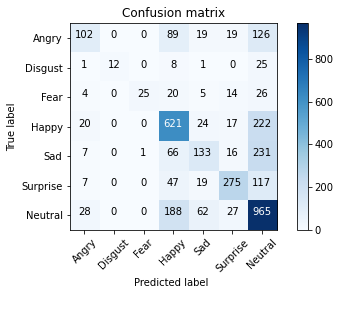

In [7]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)

## XGBoost with Landmarks

In [8]:
xgbmodel = XGBClassifier(objective='multi:softprob', 
                         num_class= len(emotions), 
                         use_label_encoder=False,
                         eval_metric='mlogloss')

print("fitting")
xgbmodel.fit(X_trainLAND, y_train)

print("scoring")
xgbmodel.score(X_testLAND, y_test)

fitting
scoring


0.5739760378935637

In [9]:
y_pred = xgbmodel.predict(X_testLAND)
print(classification_report(y_test, y_pred, target_names=emotions))

              precision    recall  f1-score   support

       Angry       0.49      0.25      0.33       355
     Disgust       0.64      0.19      0.30        47
        Fear       0.58      0.15      0.24        94
       Happy       0.61      0.73      0.66       904
         Sad       0.39      0.13      0.20       454
    Surprise       0.60      0.52      0.56       465
     Neutral       0.57      0.78      0.66      1270

    accuracy                           0.57      3589
   macro avg       0.56      0.39      0.42      3589
weighted avg       0.55      0.57      0.54      3589



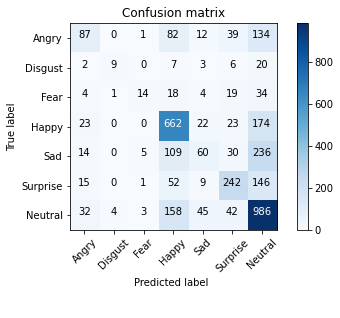

In [10]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = emotions)